# Linear Regression


## อิมพอร์ตไลบรารีที่ใช้

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas

## Import traning set เข้าสู้โปรแกรม

* X คือ ความกว้างของกลีบเลี้ยง (cm)
* Y คือ ความยาวของกลีบเลี้ยง (cm)

In [2]:
Data = pandas.read_excel("linear_regression.xls")
Data.iloc[:5, :] #แสดงตัวอย่างข้อมูล

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


## จัดการข้อมูล

In [3]:
X = np.array(Data['X'])
X = X.reshape((X.shape[0], 1))
X = np.append(np.ones((X.shape[0], 1)), X, axis=1) #Add bias column to X

Y = np.array(Data['Y'])
Y = Y.reshape((Y.shape[0], 1))

## หน้าตาข้อมูล

<IPython.core.display.Javascript object>


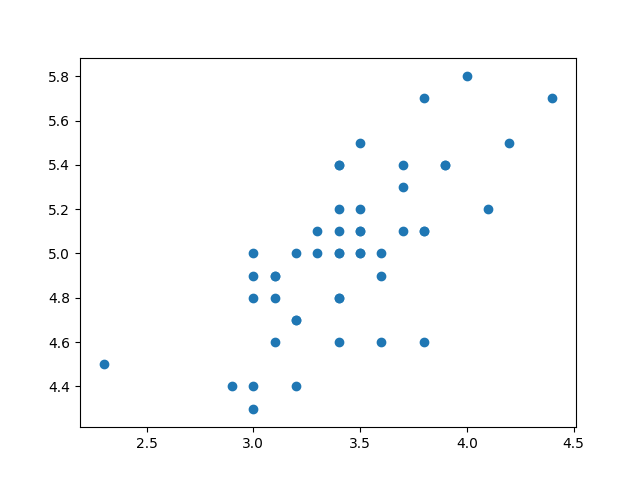

In [4]:
plt.figure(1)
plt.scatter(X[:, 1], Y)

## Hypothesis

สมการเส้นตรง

\begin{equation}
h(x) = \theta_0 * x_0 + \theta_1 * x_1\\
or \\
h(X) = X\theta^T
\end{equation}

In [5]:
def linear_regression(X, Theta):
    return X.dot(Theta.transpose())

## Cost Function

เป็นฟังก์ชั่นที่ใช้ในการหาค่าความผิดพลาดของโมเดล โดยคำนวนจากผลการทำนายเปรียบเทียบกับค่าคำตอบจริง

\begin{equation}
J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 \\
or \\
J(\theta) = \frac{1}{2m}(Z^TZ) ; Z = h(X)-Y
\end{equation}

In [6]:
def cost_function(X, Y, Theta):
    Y_ = linear_regression(X, Theta)
    m = X.shape[0]
    return (Y_ - Y).transpose().dot((Y_ - Y)) * float((1 / float(2 * m)))

## Gradient Descent

ฟังก์ชั่นที่ใช้ในการอัพเดตค่า Theta

\begin{equation}
\theta_j := \theta_j - \alpha * \frac{d}{dx} j(\theta) \\
\theta_j := \theta_j - \alpha * \frac{1}{m}\sum_{i=1}^m (h(x_i)-y_i) * x_{(i, j)}
\end{equation}

In [7]:
def gradient_descent(X, Y, Theta, learning_rate, iterate):
    sample_size, feature_size = X.shape
    for i in xrange(iterate):
        Y_ = linear_regression(X, Theta)
        temp_update = []
        error = Y_ - Y
        for j in xrange(feature_size):
            temp_update.append(learning_rate * (1 / float(sample_size)) * np.sum(error * X[:, j].reshape(X.shape[0], 1)))
        update_values = np.array(temp_update)
        Theta = Theta - update_values
    return Theta

## การใช้งาน

กำหนดค่า Theta เริ่มต้น (จะเป็นค่าอะไรก็ได้)

In [8]:
Theta = np.ones([1, 2])
Theta

array([[ 1.,  1.]])

กำหนด Learning rate และจำนวนรอบในการทำซ้ำ ซึ่งค่าทั้งสองจำเป็นต้องตั้งค่าให้เหมาะสม 
ผลลัพทธ์จากการคำนวณหรือค่า Theta ที่ได้ก็คือโมเดลของเรานั่นเอง

In [9]:
Theta = gradient_descent(X, Y, Theta, learning_rate = 0.001, iterate = 1000)
Y_ = linear_regression(X, Theta)

เมื่อทำการเทรนเสร็จแล้วจะมาทำการหาค่าความผิดพลาดของโมเดล (ค่า Cost)

In [10]:
print "Cost = ", cost_function(X, Y, Theta)

Cost =  [[ 0.04845979]]


## ผลที่ได้จากการเทรน

<IPython.core.display.Javascript object>


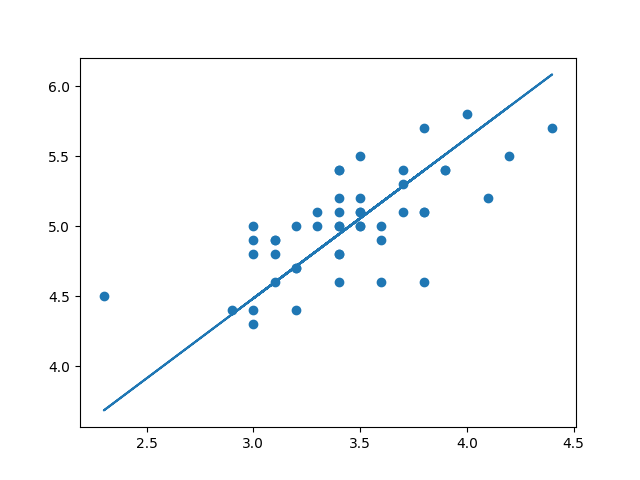

In [11]:
plt.figure(2)
plt.scatter(X[:, 1], Y) #พล๊อตข้อมูล Training Set
plt.plot(X[:, 1], Y_) #พล๊อตเส้นทำนาย